We saw last week how to use gradient descent to minimise a function. Today we'll look at extending this idea to machine learning. I've put in any maths needed for differentiation, but don't worry if you don't understand it: If you just accept it as correct for now and come back to look at it when you have covered it in school in a few months that will be fine.

Machine learning is quite a wide subject, but we'll be looking at Adaline today. The ideas behind Adaline can be scaled up and applied to larger neural networks without much change to the fundamental ideas. Of course, there are plenty of other methods in ML but this is perhaps the most used type.

Before we begin with how Adaline works, I want to say a little bit about the components of ML that are not part of the main model such as model validation and data preprocessing. We won't be looking at them very much today, but these are integral parts of the ML process.

# AdaLiNe (Adaptive Linear Neuron) explanation

With Adaline, we begin by creaing an untrained model. This model will initially be worthless as it is untrained, so the outputs will effectively be random wrt the inputs.

If we take the example of classifying images of handwritten numbers, we would create a model that is a function which takes an image as input and returns a number (in this case from 0 to 9 inclusive).

The outputs would be incorrect to begin with, as this function is untrained.

When we train the model, we need to have some way of changing how it behaves so that we can allow it to improve through training. We do this by giving it a second input, w (for weights), which indicates its behaviour.

We now have:
f(image, weights) -> prediction for image content

Before we get onto how we train this function, let's define it. Because we are using Adaline, we can define the function as follows (more complex ML algorithms use more complex functions, but these are also more difficult to train):
```
f(image, weights) = image ⋅ weights
```
This may seem like strange notation, so I'll explain what it means. First of all, the image input will be a vector - that is a simple list of numbers. The weigths input will also be a vector the same length as the image.

The `⋅` operator is called the "dot product". In the case of two **vectors** (note this does *not* apply to matrices), the dot product computes the sum of the products of corresponding elements.

For example:
```
[ 1 ]   [ 4 ]
[ 2 ] . [ 5 ] = 1*4 + 2*5 + 3*6 = 4 + 10 + 18 = 32
[ 3 ]   [ 6 ]
```

If we multiply the weights with the image pixels elementwise, it means that each weight dictates how much the value of each element contributes to the overall value (weights can be any real number, inc. negatives).

If we had a function `f([a, b]) = a` that we wish to approximate (that is, we want to use machine learning to predict the output of this function, given its input), then we could create make a new function to model `f` as: `model([a, b], w) = a*w_1 + b*w_2` (note this is the same as `model([a, b], w) = [a, b] ⋅ w`, where `w = [w_1, w_2]`).

If we trained the model well, we would see that `w -> [1, 0]`, so that `model([a, b], w) -> a*1 + b*0 = a = f([a, b])`.

*Note: It is advised to also add a bias unit to the model. This can be added by appending a `1` to the input vector`

We will be using a linear activation today, so this is our final model, but in more complex models they will use a function to confine all outputs to a certain range (usually `[0,1]` or `[-1,1]`)

Now that we have our model, we need to train it by finding values for `w` that are as close as possible to the function we are trying to approximate: this is where gradient descent comes in. 

Firstly, we do not know what the function we are trying to approximate actually is. If we did, there would be no reason to use machine learning to find it. What we do have, though, is a load of inputs and corresponding outputs for this function. We can use these to "train" our weight values to act like the function we are trying to approximate does on the dataset. This is where a lot of interesting issues with machine learning come in, such as the model being too complex and learning the dataset by heart (overfitting); the model not being complex enough and not being able to simulate the complexity of what it is approimating (underfitting); or the issue with there not being enough data for the model to fully understand the original function. We won't go through these issues in more depth today but I strongly reccomend googling them (*an activity for the interested reader*).

Let's begin by defining the "loss" of our model for each piece of training data as follows:
```
y = correct output
x = input
w = weights
loss = (model(x, w) - y)^2 / 2
```
The overall loss is therefore the sum of the losses of all inputs. (the `/2` is arbirtary, but will make the differentiation nicer later)

There are many types of loss functions. This is called the *Sum of squared error* (SSE).

We want to find the value for the weights of our function that has the lowest SSE. How do we find the minimum value of a function? *Gradient descent*

With the same process as last week:
```
loss = (model(x, w) - y)^2 / 2 = (x ⋅ w - y)^2 / 2
dloss / dw_i = (x ⋅ w - y) * x_i
```

with learning rate, `a`, we can define the update to the weight vector as:
```
w_i = w_i - a * (x ⋅ w - y) * x_i
```

*Note that `(x ⋅ w - y)` evaluates to a scalar if `x` and `w` are vectors (if there are multiple outputs, this may not be the case*

Becasue we are using numpy we will be able to do this for all datapoints at once

We can then repeat this process a bunch of times to get to the minimum value of the loss function for each element in out weight vector.

# Adaline implementation

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [ ]:
class Adaline:

  def __init__(self, x_shape):
    self.w = np.zeros((x_shape + 1,))
    self.threshold = 0.5

  def train(self, x, y, epochs=100, a=0.0001):
    x = np.concatenate((x, np.ones((x.shape[0],1))), axis=1)  # add bias
    self.losses = []
    for __ in range(epochs):
      errors = np.dot(x, self.w) - y
      self.w -= a * x.T.dot(errors)  # w = w - a * (x ⋅ w - y) * x
      loss = (errors**2).sum() / 2
      self.losses.append(loss)
    return self.losses

  def predict_prob(self, x):  # x is a vector of inputs
    x = np.concatenate((x, np.ones((x.shape[0],1))), axis=1)
    return np.dot(x, self.w)

  def predict(self, x):  # x is a vector of inputs
    return np.asarray([int(i>self.threshold) for i in self.predict_prob(x)])  # output won't be boolean so apply threshold

In [ ]:
iris = datasets.load_iris()
x = iris.data[:100]
y = iris.target[:100]
x.shape

(100, 4)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

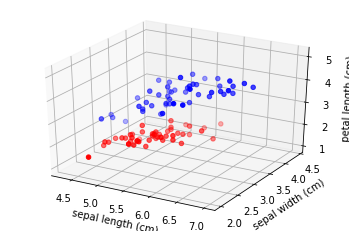

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:50][:,0], x[:50][:,1], x[:50][:,2], color="red", label="Iris Setosa")
ax.scatter(x[50:][:,0], x[50:][:,1], x[50:][:,2], color="blue", label="Iris Versicolour")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.set_zlabel("petal length (cm)")

plt.show()

In [ ]:
model = Adaline(4)

In [ ]:
model.predict(x)  # untrained -> rubbish

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

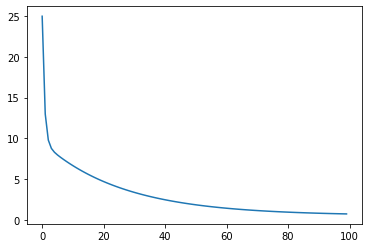

In [ ]:
plt.plot(model.train(x, y, epochs=100))

In [ ]:
model.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.round(model.predict_prob(x), 2)

array([ 0.06,  0.11,  0.06,  0.12,  0.05,  0.11,  0.07,  0.09,  0.11,
        0.11,  0.07,  0.11,  0.1 ,  0.02, -0.03,  0.02,  0.02,  0.07,
        0.12,  0.06,  0.15,  0.08, -0.05,  0.18,  0.18,  0.16,  0.13,
        0.09,  0.07,  0.13,  0.14,  0.12,  0.01, -0.01,  0.12,  0.04,
        0.04,  0.04,  0.08,  0.09,  0.04,  0.16,  0.06,  0.14,  0.16,
        0.12,  0.07,  0.08,  0.07,  0.08,  1.01,  0.96,  1.08,  0.91,
        1.03,  0.97,  1.01,  0.69,  1.  ,  0.84,  0.78,  0.9 ,  0.9 ,
        1.03,  0.75,  0.95,  0.97,  0.86,  1.06,  0.84,  1.05,  0.86,
        1.13,  1.02,  0.93,  0.95,  1.07,  1.12,  0.99,  0.73,  0.83,
        0.8 ,  0.84,  1.16,  0.97,  0.94,  1.03,  1.01,  0.86,  0.88,
        0.96,  0.99,  0.87,  0.7 ,  0.91,  0.87,  0.89,  0.92,  0.62,
        0.88])

more info: https://colab.research.google.com/drive/1erep4I-6bOARjyFphpdISF_S6wkP5UCL#scrollTo=AJTRYHyWb08m

**REMEMBER TO ASK ABOUT COM SOC NEXT WEEK**